<a href="https://colab.research.google.com/github/Emanuel-Baisire/DevelopingDataProducts/blob/master/Final_Malaria_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Final Model Data Exploration

In [1]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()


# Mounting the drive

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Extract zip file to the local environment unzip command

!unzip gdrive/My\ Drive/malaria/cell_images.zip

In [ ]:
# Importing Libraries required

import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

In [ ]:
# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# Run the same code for "parasitized" as well as "uninfected" folders within the "train" folder

for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# Run the same code for "parasitized" as well as "uninfected" folders within the "test" folder

for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

In [ ]:
# Checking the shape of train and test labels

# Shape of test and tran image

print("Shape:", train_images.shape)

print()


print("Shape:", test_images.shape)

print()

#print("First image:\n", test_images[0])

print("Shape:", train_labels.shape)

print()

print("Shape:", test_labels.shape)

print()

Shape: (24958, 64, 64, 3)

Shape: (2600, 64, 64, 3)

Shape: (24958,)

Shape: (2600,)



In [ ]:
# Observations: There are 24958 images in the training dataset and 2600 images in testing data.The data shape is 64 images of height and width 64 and three colored RGB channels.

In [ ]:
# Check the minimum and maximum range of pixel values for train and test images

import numpy as np

# Train size

min_images = train_images.min()
max_images = train_images.max()
print(min_images, max_images)

0 255


In [ ]:
# Test size

min_images = test_images.min()
max_images = test_images.max()
print(min_images, max_images)

0 255


In [ ]:
# Observations and Insights Both test and train images have pixel values ranging from 0 to 255. There is a need to normalize due to computational price to be paid if we fed the data as it is in a Deep Neural Network.The next step will be to normalize the value with a range of 0 to 1.

In [ ]:
# Count the number of values in both uninfected and parasitized

# Number of Training data with parasite vs uninfected

parasite_train= []
uninfected_train = []

for i in train_labels:
  if i == 1:
    parasite_train.append(i)

else:
  uninfected_train.append(i)



parasite_train = pd.DataFrame(parasite_train)
parasite_train.value_counts()

uninfected_train = pd.DataFrame(uninfected_train)
uninfected_train.value_counts()

print(parasite_train.value_counts())

1    12582
dtype: int64


In [ ]:
# # Number of Testing data with parasite vs uninfected

parasite_test= []
uninfected_test = []

for i in test_labels:
  if i == 1:
    parasite_test.append(i)

else:
  uninfected_test.append(i)



parasite_test = pd.DataFrame(parasite_test)
parasite_test.value_counts()

uninfected_test = pd.DataFrame(uninfected_test)
uninfected_test.value_counts()



# Print parasitic test and train data
print('Number of train labels identified with parasites:',parasite_train.value_counts())

print('Number of test labels identified with parasites:',parasite_test.value_counts())

Number of train labels identified with parasites: 1    12582
dtype: int64
Number of test labels identified with parasites: 1    1300
dtype: int64


# Observations and Insight

Number of parasitic images in train label dataset is 12582 and the rest are uninfected.

Number of parasitic images in test label dataset is 1300 and the rest are uninfected.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()



# Normalize train and test images by dividing it by 255 and convert them to float32 using astype function

train_images = (train_images/ 255).astype('float32') 

test_images = (test_images/255).astype('float32')

print(test_images.max())

#test_images.min()

#test_images.max()

print(train_images.min(), '- ',train_images.max())

print()

print(test_images.min(), '- ',test_images.max())

print()

1.0
0.0 -  1.0

0.0 -  1.0



 Observations and insights: Both train and test images have been normalized with a value range between 0 and 1. This step helps in reducing the computational efforts needed to feed inputs to the proposed Deep Neural Network

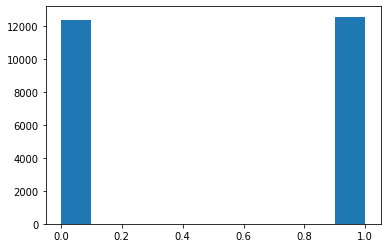

In [ ]:
# Plot to check if the data is balanced

# # You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train
# and test data and check if they are balanced

plt.hist(train_labels);

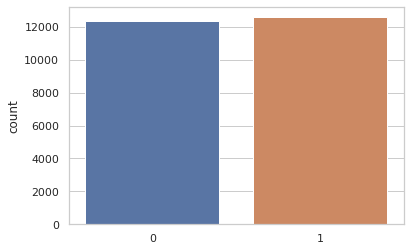

In [ ]:
# Plot to check if the train and test data labels are balanced

# Checking for Train data balance

import numpy as np
import matplotlib.pyplot as plt
 
  
import seaborn as sns
sns.set_theme(style="whitegrid")

x = test_labels
sns.countplot(x=train_labels);

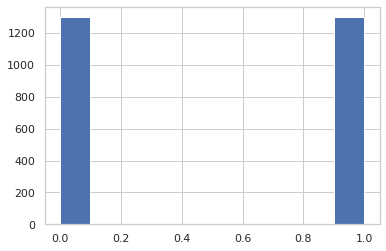

In [ ]:
# # Checking for Test data balance

plt.hist(test_labels);

# Observations and Insights

Both Parasite and uninfected labels are balanced for both train and data labels.

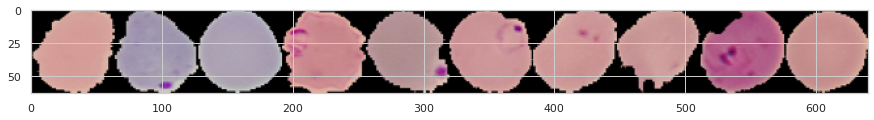

In [ ]:
# Data Exploration for training images


np.random.seed(10)

concat_img = None
for i in range(10):
    idx = np.random.randint(train_images.shape[0])
    if concat_img is None:
        concat_img = train_images[idx]
    else:
        concat_img = np.concatenate([concat_img, train_images[idx]], axis=1)
plt.figure(figsize=(15, 5)) 
plt.imshow(concat_img);


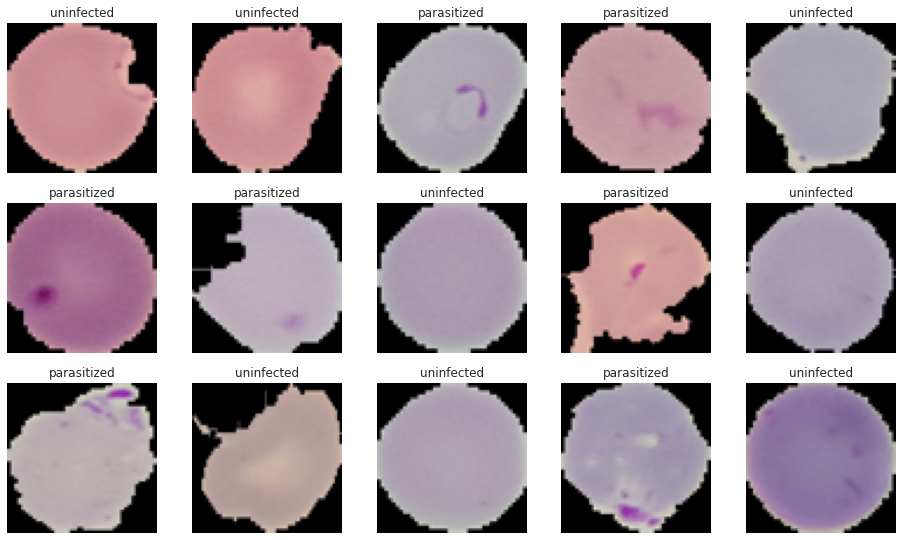

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 16):

    plt.subplot(5, 5, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

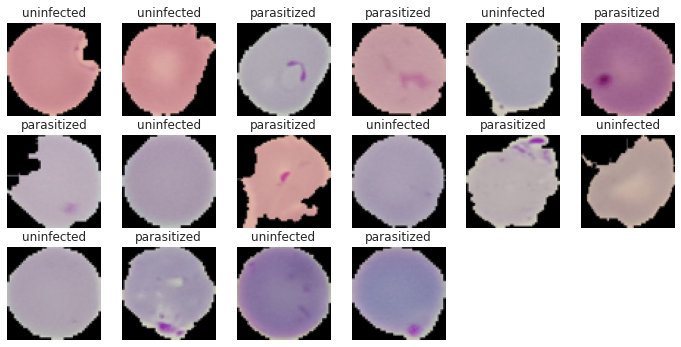

In [ ]:
# Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

# Visualizing both the parasitized and uninfected images

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 17):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

#Observations and Insights Parasitized blood cells have visiblly red marks on any side of the image while uninfected images are clear with no marks. 

In [ ]:
# Plotting the mean images for parasitized and uninfected

# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

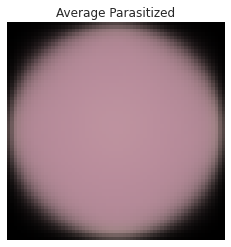

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

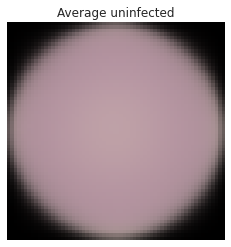

In [ ]:
 # Mean image for uninfected


# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected.

uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'uninfected')   # find the mean

In [ ]:
#Converting RGB to HSV of Images using OpenCV

import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

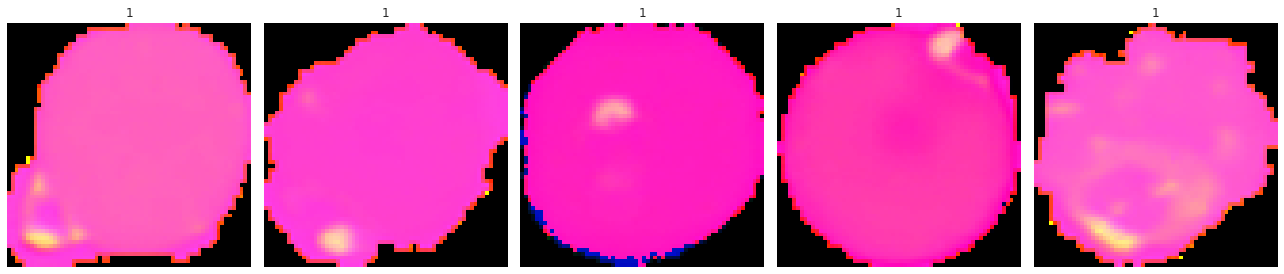

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

In [ ]:
# Converting the test data

# Test Data

import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

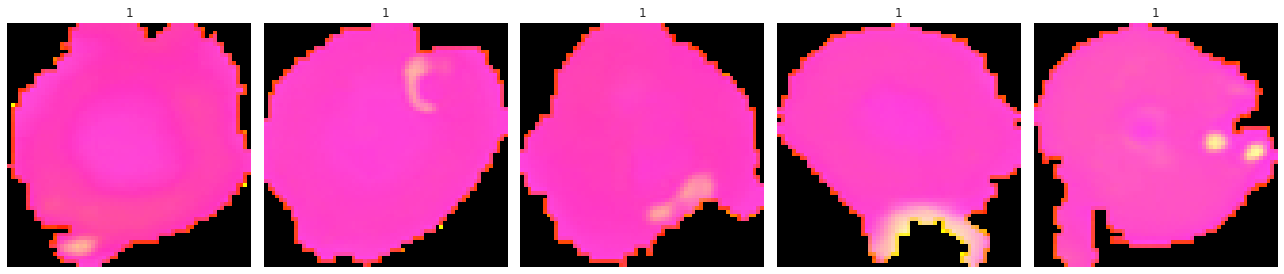

In [ ]:
# Visualize Test Data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

In [ ]:
#Processing Images using Gaussian Blurring

gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

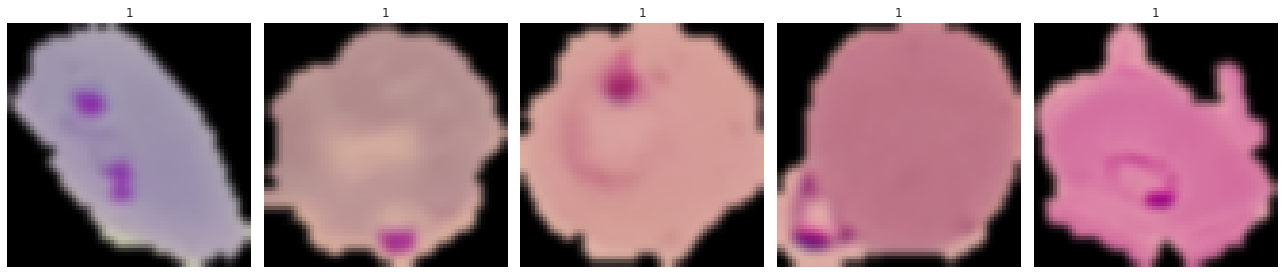

In [ ]:
# Visualizing

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

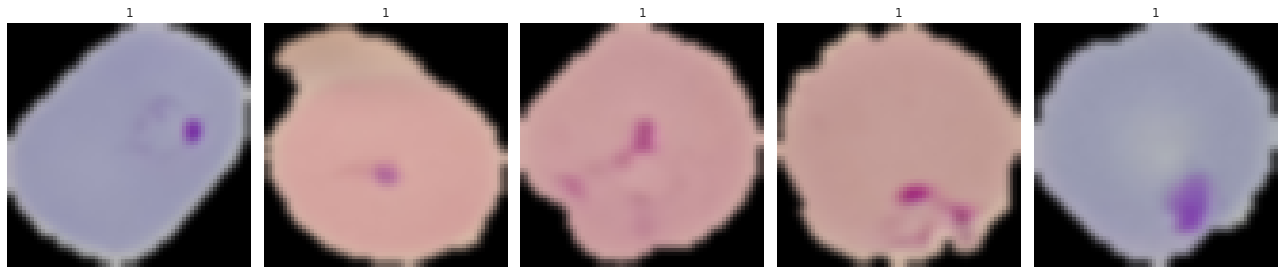

In [ ]:
# Gaussian Blurring on test data

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()


# Observations and Insights

# The blurred images helps to capture parasite spread with less background noise. This helps the model to focus on the attributes/inputs that directly influence the model in real life situations. In this case, the model would focus on the parasitic attributes that will allow it to predict any unseen image by focusing the generalized model during training.

# Proposed approach The implementation approach for this model will include data-preprocessing to ensure that we are able feed the input into the model to predict Parasitic and uninfected people.

# After rescaling the train and test data, a first step will be to appy data augmentation techniques to enhance image cell dataet.

# The dataset will then be split into train and validation datasets to be used to run a CNN model. To successfuly identify malaria parasites, several techniques will be used including dropout methods, relu activation functions.

# The next step will involve assessing the model performance by using techniques such as binary_crossentropy loss function', ADAM optimizer and accuracy.

# Based on the outlined techniques, the projected accuracy level to detect parasites microscopic images will be over 90%.

In [ ]:
# Final Model Architecture

In [ ]:

# Mounting the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# How to convert Collab Notebook to HTML
# Download the notebook file >> then upload .ipynb to file/Drive >>> get file path>>> then run a script

%%shell
jupyter nbconvert --to html ////content/drive/MyDrive/Malaria_Detector_Model.ipynb

jupyter nbconvert --to html ////content/drive/MyDrive/Final_Malaria_Deep_Learning_Model.ipynb

[NbConvertApp] Converting notebook ////content/drive/MyDrive/Malaria_Detector_Model.ipynb to html
[NbConvertApp] Writing 1389555 bytes to ////content/drive/MyDrive/Malaria_Detector_Model.html
[NbConvertApp] Converting notebook ////content/drive/MyDrive/Final_Malaria_Deep_Learning_Model.ipynb to html
[NbConvertApp] Writing 2353991 bytes to ////content/drive/MyDrive/Final_Malaria_Deep_Learning_Model.html


In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

# Model Build Libraries

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical


# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                train_labels.append(1)
            
            else:
            
                train_labels.append(0)
        
        except Exception:
        
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
     
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                
                test_labels.append(1)
            
            else:
            
                test_labels.append(0)
        
        except Exception:
        
            pass      

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)           

In [ ]:
# Image Normalization


# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

In [ ]:
# One Hot Encoding on the train and test labels

# Encoding Train Labels

train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Sample Model Build

# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
# Compiling the Model

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Using Callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 

history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 92s 146ms/step - loss: 0.4545 - accuracy: 0.7720 - val_loss: 0.2216 - val_accuracy: 0.9726
Epoch 2/20
624/624 [==============================] - 88s 141ms/step - loss: 0.1210 - accuracy: 0.9593 - val_loss: 0.0929 - val_accuracy: 0.9890
Epoch 3/20
624/624 [==============================] - 87s 140ms/step - loss: 0.0868 - accuracy: 0.9705 - val_loss: 0.0805 - val_accuracy: 0.9824
Epoch 4/20
624/624 [==============================] - 87s 140ms/step - loss: 0.0786 - accuracy: 0.9745 - val_loss: 0.0442 - val_accuracy: 0.9916
Epoch 5/20
624/624 [==============================] - 86s 138ms/step - loss: 0.0733 - accuracy: 0.9757 - val_loss: 0.0680 - val_accuracy: 0.9842
Epoch 6/20
624/624 [==============================] - 88s 141ms/step - loss: 0.0698 - accuracy: 0.9762 - val_loss: 0.0619 - val_accuracy: 0.9856


In [ ]:
# Evaluating the model on test data

accuracy = model.evaluate(test_images, test_labels, verbose = 1)

print('/n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 3s 36ms/step - loss: 0.0690 - accuracy: 0.9819
/n Test_Accuracy:- 0.9819231033325195


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



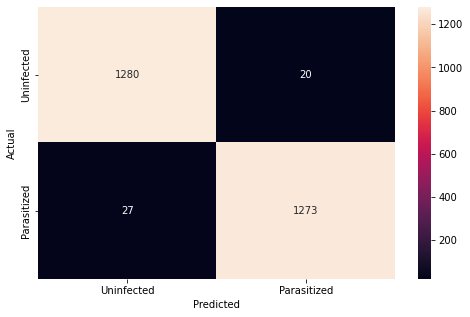

In [ ]:
# Plotting the Confusion Matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the Classification Report

print(classification_report(y_true, pred))

# Plotting the heatmap using Confusion Matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels= ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


In [ ]:
# Plotting the train and validation curves

# Function to plot train and validation accuracy

def plot_accuracy(history):

  N = len(history.history['accuracy'])

  plt.figure(figsize = (7,7))

  plt.plot(np.arange(0, N), history.history['accuracy'], label = 'train_accuracy', ls = '--' )
  
  plt.plot(np.arange(0,N), history.history['val_accuracy'], label = 'val_accuracy', ls = '--')

  plt.title('Accuracy vs Epoch')

  plt.xlabel('Epochs')

  plt.ylabel('Accuracy')

  plt.legend(loc = 'lower right')


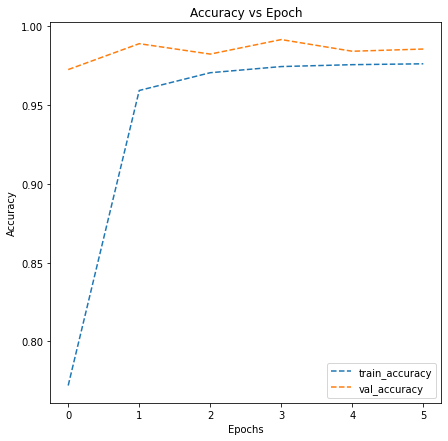

In [ ]:
plot_accuracy(history)

**Observation and Insight**

Here we can clearly observe that the training and validation accuracy are increasing
And we can also notice that validation accuracy is slightly higher than the train accuracy

In [ ]:
# Model 1 performance Improvement by adding new layers

backend.clear_session()  # Clearing the backend for new model

# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Dropout(0.2))

 
model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))



model_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Dropout(0.2))


# New Add 3 new layers with 64 filters

model_1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model_1.add(MaxPooling2D(pool_size = 2))
model_1.add(Dropout(0.2))

model_1.add(Flatten())

model_1.add(Dense(500, activation = "relu"))

model_1.add(Dropout(0.4))

# Add a new Activation function

model_1.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons 

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
# Compile Model 1

model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
# Using Callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history_model_1 = model_1.fit(train_images, train_labels, batch_size = 28, callbacks = callbacks, validation_split = 0.2, epochs = 22, verbose = 1)

Epoch 1/22
714/714 [==============================] - 91s 126ms/step - loss: 0.2838 - accuracy: 0.8636 - val_loss: 0.0477 - val_accuracy: 0.9866
Epoch 2/22
714/714 [==============================] - 88s 123ms/step - loss: 0.0912 - accuracy: 0.9715 - val_loss: 0.1109 - val_accuracy: 0.9683
Epoch 3/22
714/714 [==============================] - 87s 123ms/step - loss: 0.0836 - accuracy: 0.9732 - val_loss: 0.0472 - val_accuracy: 0.9844
Epoch 4/22
714/714 [==============================] - 88s 123ms/step - loss: 0.0777 - accuracy: 0.9752 - val_loss: 0.0454 - val_accuracy: 0.9832
Epoch 5/22
714/714 [==============================] - 89s 124ms/step - loss: 0.0744 - accuracy: 0.9754 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 6/22
714/714 [==============================] - 88s 123ms/step - loss: 0.0731 - accuracy: 0.9755 - val_loss: 0.0324 - val_accuracy: 0.9882
Epoch 7/22
714/714 [==============================] - 91s 127ms/step - loss: 0.0708 - accuracy: 0.9771 - val_loss: 0.0495 - val_ac

In [ ]:
# Evaluating the model1 on test data
accuracy = model_1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])


82/82 [==============================] - 3s 37ms/step - loss: 0.0614 - accuracy: 0.9796

 Test_Accuracy:- 0.9796153903007507


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1300
           1       0.97      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



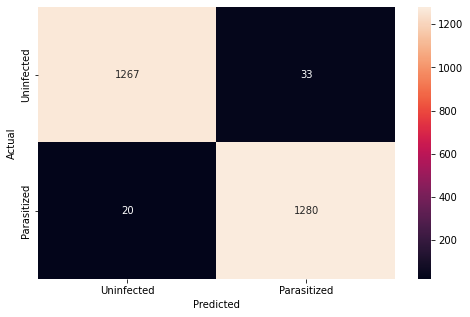

In [ ]:
# Plotting the confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
backend.clear_session()

In [ ]:
def plot_accuracy_1(history):

  N = len(history_model_1.history['accuracy'])

  plt.figure(figsize = (7,7))

  plt.plot(np.arange(0, N), history_model_1.history['accuracy'], label = 'train_accuracy', ls = '--' )
  
  plt.plot(np.arange(0,N), history_model_1.history['val_accuracy'], label = 'val_accuracy', ls = '--')

  plt.title('Accuracy vs Epoch')

  plt.xlabel('Epochs')

  plt.ylabel('Accuracy')

  plt.legend(loc = 'lower right')

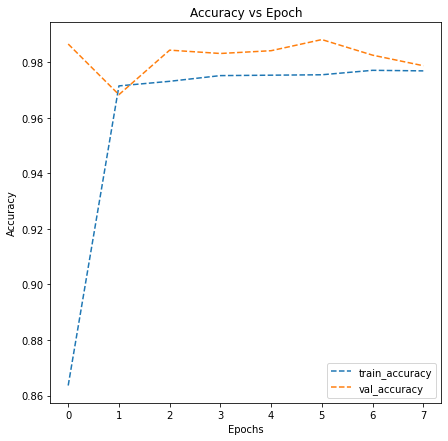

In [ ]:

plot_accuracy_1(history)

**Observations and Insights**

In [ ]:
#  Model with LeakyRelu as the activation function and Using BatchNormalization regularization technique

from tensorflow.keras.layers import LeakyReLU

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))
# model_2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3),padding = "same"))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Conv2D(32, kernel_size=(3, 3)))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())


model_2.add(Conv2D(32, kernel_size=(3, 3)))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(BatchNormalization())

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(Dense(2, activation='softmax'))

adam = optimizers.Adam(learning_rate = 0.001)

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 30, 30, 32)        0

**Think About it - Observations and Insights**

In [ ]:
# Compile Model 2

model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Using callbacks Model 2

# Using Callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit and train the model

history_model_2 = model_2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)


Epoch 1/20
624/624 [==============================] - 123s 196ms/step - loss: 0.1784 - accuracy: 0.9305 - val_loss: 0.7067 - val_accuracy: 0.6753
Epoch 2/20
624/624 [==============================] - 123s 197ms/step - loss: 0.0826 - accuracy: 0.9732 - val_loss: 0.1835 - val_accuracy: 0.9696
Epoch 3/20
624/624 [==============================] - 121s 194ms/step - loss: 0.0684 - accuracy: 0.9764 - val_loss: 0.0429 - val_accuracy: 0.9886
Epoch 4/20
624/624 [==============================] - 123s 197ms/step - loss: 0.0607 - accuracy: 0.9796 - val_loss: 0.1332 - val_accuracy: 0.9822
Epoch 5/20
624/624 [==============================] - 123s 197ms/step - loss: 0.0563 - accuracy: 0.9811 - val_loss: 0.0376 - val_accuracy: 0.9942
Epoch 6/20
624/624 [==============================] - 134s 215ms/step - loss: 0.0495 - accuracy: 0.9832 - val_loss: 0.0864 - val_accuracy: 0.9800
Epoch 7/20
624/624 [==============================] - 127s 204ms/step - loss: 0.0444 - accuracy: 0.9855 - val_loss: 0.0853 -

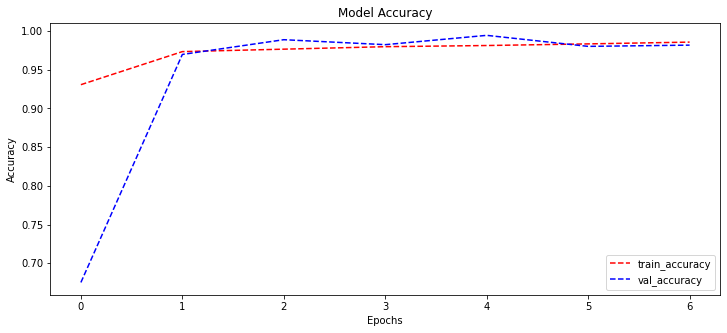

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history_model_2.history['accuracy'], color='r',ls = '--')

# history_model_2
plt.plot(history_model_2.history['val_accuracy'], color='b',ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
# Evaluating the model on test data

accuracy = model_2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 5s 59ms/step - loss: 0.0555 - accuracy: 0.9854

 Test_Accuracy:- 0.9853846430778503


**Observations and Insight- Model 2 ** 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



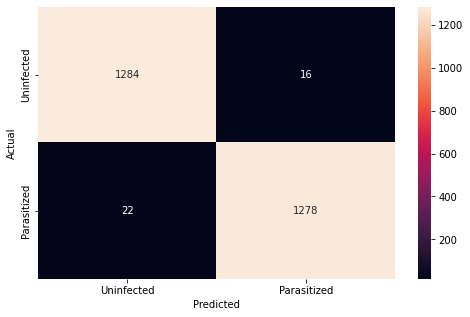

In [ ]:
# Plotting the confusion matrix

# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_2.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Think About it - Observation**

In [ ]:
# Creating model architecture - Alternative_2_1
model_2_1 = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (64, 64, 3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        MaxPooling2D(2,2),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(0.1),
        MaxPooling2D(2,2),

        Flatten(),
    
        Dense(64),
        BatchNormalization(),
        LeakyReLU(0.1),
        
        Dense(32),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        BatchNormalization(),
        LeakyReLU(0.1),
    
        Dense(2, activation = 'softmax')    
        ])

adam = optimizers.Adam(learning_rate = 0.001)
model_2_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 16)       64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 62, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 60, 60, 32)        0

In [ ]:
# Compile Model model_2_1

model_2_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Using callbacks model_2_1

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit and train the model_2_1

history_model_2_1 = model_2_1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 407s 651ms/step - loss: 0.2371 - accuracy: 0.9146 - val_loss: 0.0744 - val_accuracy: 0.9880
Epoch 2/20
624/624 [==============================] - 392s 628ms/step - loss: 0.0943 - accuracy: 0.9675 - val_loss: 0.1386 - val_accuracy: 0.9685
Epoch 3/20
624/624 [==============================] - 400s 641ms/step - loss: 0.0826 - accuracy: 0.9714 - val_loss: 0.0313 - val_accuracy: 0.9926
Epoch 4/20
624/624 [==============================] - 397s 636ms/step - loss: 0.0706 - accuracy: 0.9751 - val_loss: 0.0412 - val_accuracy: 0.9872
Epoch 5/20
624/624 [==============================] - 398s 637ms/step - loss: 0.0614 - accuracy: 0.9789 - val_loss: 0.0976 - val_accuracy: 0.9824


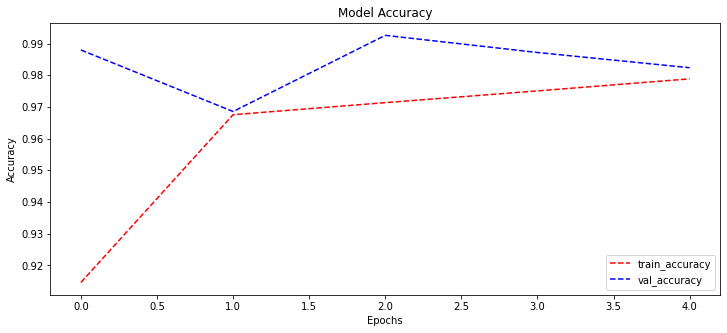

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history_model_2_1.history['accuracy'], color='r',ls = '--')

history_model_2_1 

plt.plot(history_model_2_1.history['val_accuracy'], color='b',ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])


plt.show()

In [ ]:
# Evaluating the model_2_1 on test data
accuracy = model_2_1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 13s 157ms/step - loss: 0.0802 - accuracy: 0.9812

 Test_Accuracy:- 0.9811538457870483


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



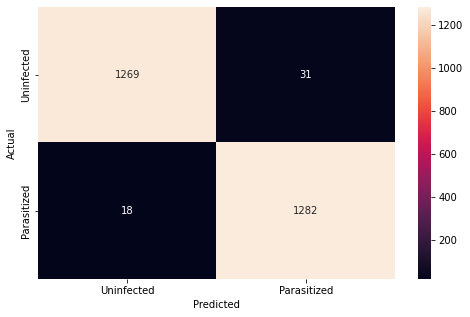

In [ ]:
# Plotting the confusion matrix

# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_2_1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report

print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
# Model 3 with Data Augmentation
backend.clear_session() # Clearing backend for new model


In [ ]:
# Using Image Data generator

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  zoom_range = 0.5, rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)


**Think About It :**
Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.

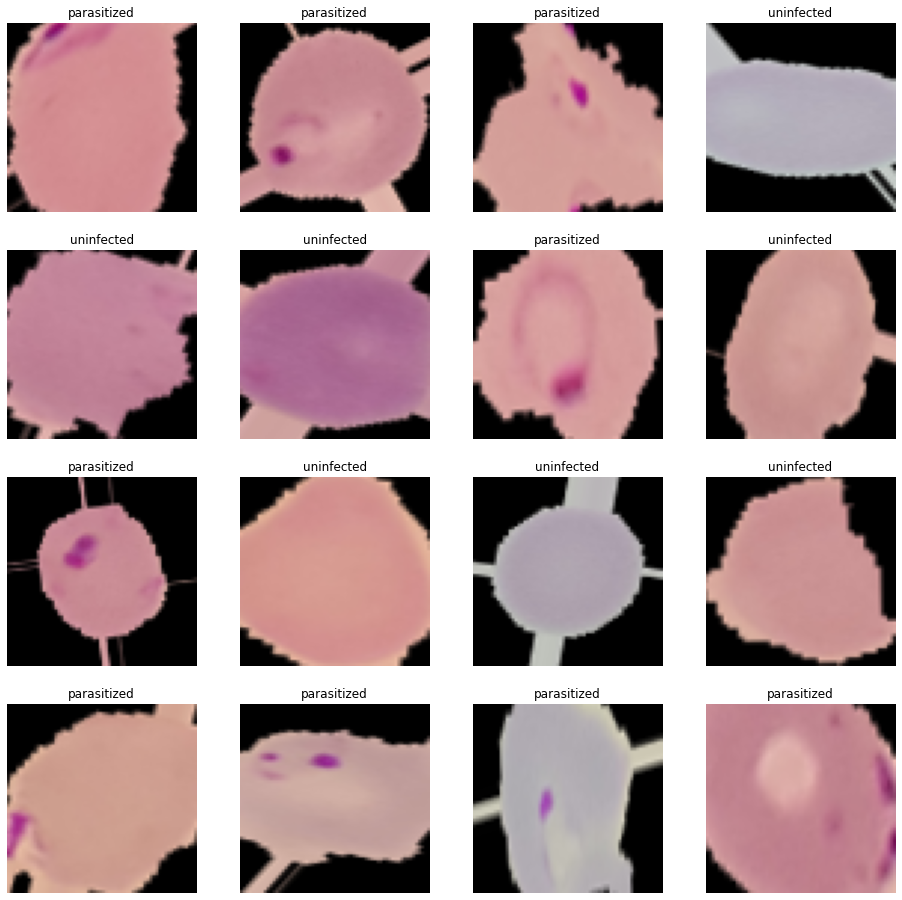

In [ ]:
# Visualizing Augmented Images

# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')


**Observations and insights: __**

In [ ]:
# Building Model_3

# model3 = Sequential()

model_3 = Sequential([
    Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'),
    #Conv2D(16, kernel_size = (3,3), input_shape = (64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Conv2D(32, kernel_size = (3,3)),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(2,2),
    
    Conv2D(64, kernel_size = (3,3)),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Conv2D(128, kernel_size = (3,3)),
    BatchNormalization(),
    LeakyReLU(0.1),
    MaxPooling2D(2,2),
    
    Flatten(),
    
    Dense(64),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Dense(32),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Dense(16),
    BatchNormalization(),
    LeakyReLU(0.1),
    
    Dense(2, activation = 'softmax')    
    
    ])

# Use this as the optimizer
adam = optimizers.Adam(learning_rate = 0.001)

model_3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 62, 62, 32)        0

In [ ]:
# Using Callbacks

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]
             

In [ ]:
# Fit and Train the model
history_3 = model_3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 64, callbacks = callbacks,
                                  epochs = 20, verbose = 1)


Epoch 1/20
312/312 [==============================] - 518s 2s/step - loss: 0.2985 - accuracy: 0.8822 - val_loss: 0.6977 - val_accuracy: 0.7101
Epoch 2/20
312/312 [==============================] - 512s 2s/step - loss: 0.1842 - accuracy: 0.9337 - val_loss: 0.1078 - val_accuracy: 0.9645
Epoch 3/20
312/312 [==============================] - 519s 2s/step - loss: 0.1600 - accuracy: 0.9445 - val_loss: 0.1303 - val_accuracy: 0.9720
Epoch 4/20
312/312 [==============================] - 522s 2s/step - loss: 0.1511 - accuracy: 0.9474 - val_loss: 0.0831 - val_accuracy: 0.9698
Epoch 5/20
312/312 [==============================] - 535s 2s/step - loss: 0.1430 - accuracy: 0.9492 - val_loss: 0.0962 - val_accuracy: 0.9714
Epoch 6/20
312/312 [==============================] - 544s 2s/step - loss: 0.1395 - accuracy: 0.9517 - val_loss: 0.0760 - val_accuracy: 0.9752
Epoch 7/20
312/312 [==============================] - 545s 2s/step - loss: 0.1370 - accuracy: 0.9519 - val_loss: 0.0786 - val_accuracy: 0.9760

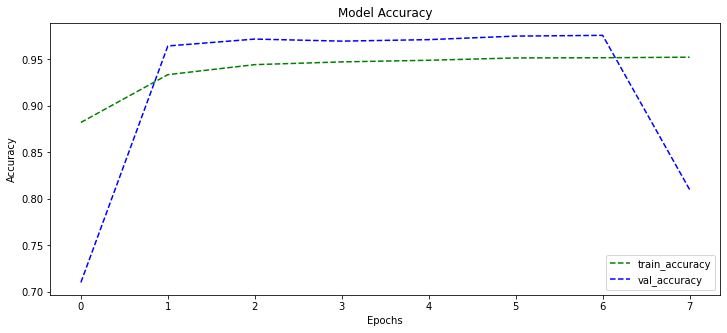

In [ ]:
# Plot the train and validation accuracy

#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history_3.history['accuracy'], color='g',ls = '--')

#history_model_3
plt.plot(history_3.history['val_accuracy'], color='b',ls = '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()


In [ ]:
# Evaluating the model on test data
accuracy_3 = model_3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy_3[1])


82/82 [==============================] - 17s 205ms/step - loss: 0.2991 - accuracy: 0.8819

 Test_Accuracy:- 0.8819230794906616


              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1300
           1       0.81      1.00      0.89      1300

    accuracy                           0.88      2600
   macro avg       0.90      0.88      0.88      2600
weighted avg       0.90      0.88      0.88      2600



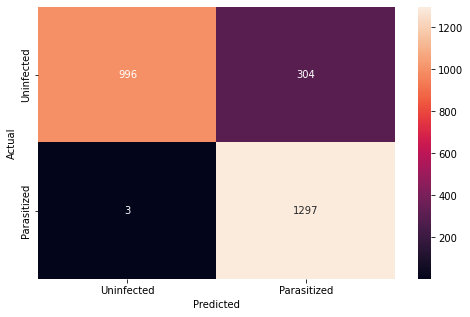

In [ ]:
# Plotting the classification report and confusion matrix

# Plotting the confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_3.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
# Model 3 with Data Augmentation
backend.clear_session() # Clearing backend for new model

In [ ]:
# Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

# Pre-trained model (VGG16)


# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model_4 = Model(vgg.input, pred) # Initializing the model

In [ ]:
# Compile Model model_4

model_4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
# Using callbacks model_4

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fitting the model and running the model for 10 epochs
history = model_4.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
624/624 [==============================] - 1042s 2s/step - loss: 0.2304 - accuracy: 0.9068 - val_loss: 0.4420 - val_accuracy: 0.8285
Epoch 2/10
624/624 [==============================] - 1028s 2s/step - loss: 0.1847 - accuracy: 0.9282 - val_loss: 0.0702 - val_accuracy: 0.9836
Epoch 3/10
624/624 [==============================] - 1025s 2s/step - loss: 0.1773 - accuracy: 0.9330 - val_loss: 0.0913 - val_accuracy: 0.9754
Epoch 4/10
624/624 [==============================] - 1042s 2s/step - loss: 0.1723 - accuracy: 0.9345 - val_loss: 0.1177 - val_accuracy: 0.9734


In [ ]:
# Evaluating the model on test data - Model_4
accuracy = model_4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy[1])


82/82 [==============================] - 109s 1s/step - loss: 0.1489 - accuracy: 0.9454

 Test_Accuracy:- 0.9453846216201782


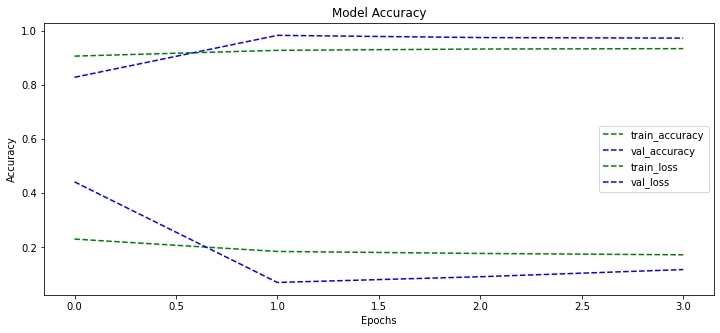

In [ ]:
# Plot the train and validation accuracy

#Plot the training history
plt.figure(figsize=(12, 5))

plt.plot(history.history['accuracy'], color='g',ls = '--')

#history_model_4
plt.plot(history.history['val_accuracy'], color='b',ls = '--')

plt.plot(history.history['loss'], color='g',ls = '--')


plt.plot(history.history['val_loss'], color='b',ls = '--')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy','train_loss','val_loss'])
plt.show()


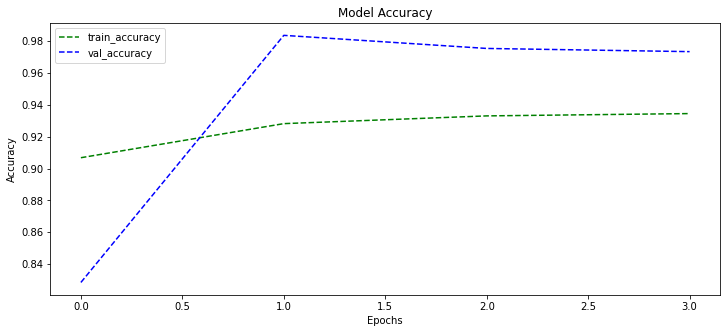

In [ ]:
# Plot the train and validation accuracy-4

#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='g',ls = '--')

#history_model_4
plt.plot(history.history['val_accuracy'], color='b', ls= '--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1300
           1       0.95      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



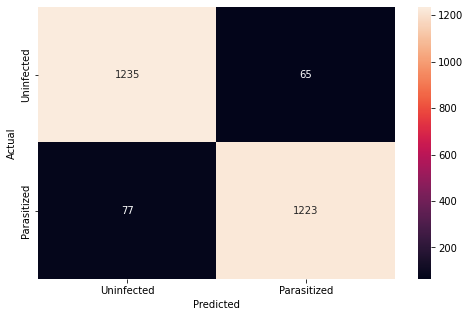

In [ ]:
# Plot the confusion matrix and generate a classification report for the model_4


# Plotting the confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_4.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


In [ ]:
# Now, let us try to use a pretrained model like VGG19 and check how it performs on our data.

# Pre-trained model (VGG19)


# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model

vgg = VGG19(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG19 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = BatchNormalization()(x)

pred = Dense(2, activation = 'softmax')(x)

model_5 = Model(vgg.input, pred) # Initializing the model

In [ ]:
# Compile Model model_5

model_5.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Using callbacks model_5

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fitting Model_5 - 10 Epochs

history_model_5 = model_5.fit(
            train_images, train_labels,
            epochs = 10,
            callbacks = callbacks,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
624/624 [==============================] - 1280s 2s/step - loss: 0.2450 - accuracy: 0.9015 - val_loss: 0.0791 - val_accuracy: 0.9852
Epoch 2/10
624/624 [==============================] - 1272s 2s/step - loss: 0.2162 - accuracy: 0.9134 - val_loss: 0.3454 - val_accuracy: 0.8788
Epoch 3/10
624/624 [==============================] - 1259s 2s/step - loss: 0.2075 - accuracy: 0.9191 - val_loss: 0.1439 - val_accuracy: 0.9589


In [ ]:
# Evaluating the model on test data - Model_5
accuracy_5 = model_5.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy_5[1])

82/82 [==============================] - 136s 2s/step - loss: 0.1930 - accuracy: 0.9215

 Test_Accuracy:- 0.9215384721755981


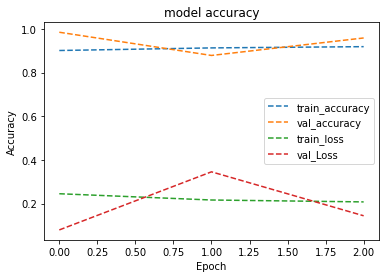

In [ ]:
# Plot the train and validation accuracy-5


import matplotlib.pyplot as plt
plt.plot(history_model_5.history["accuracy"], ls = '--')
plt.plot(history_model_5.history['val_accuracy'], ls= '--')
plt.plot(history_model_5.history['loss'],ls= '--')
plt.plot(history_model_5.history['val_loss'],ls= '--')
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train_accuracy', 'val_accuracy','train_loss','val_Loss'])
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1300
           1       0.92      0.93      0.92      1300

    accuracy                           0.92      2600
   macro avg       0.92      0.92      0.92      2600
weighted avg       0.92      0.92      0.92      2600



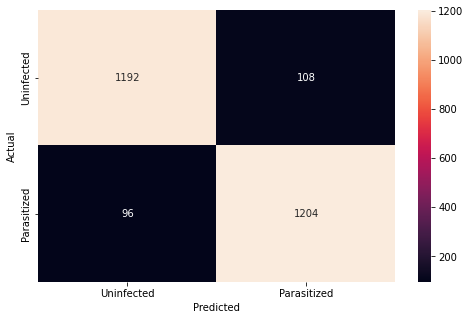

In [ ]:
# Plot the confusion matrix and generate a classification report for the model_5


# Plotting the confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model_5.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
# HSV Image Comparisons

#Converting RGB to HSV of Images using OpenCV

import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

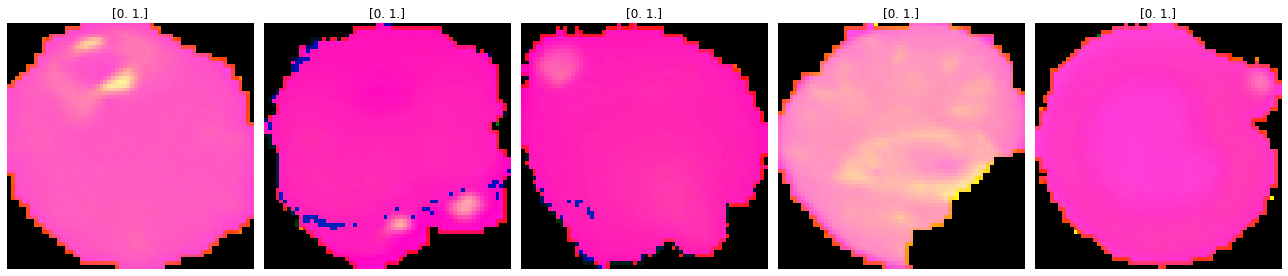

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

In [ ]:
# Converting the test data

# Test Data

import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

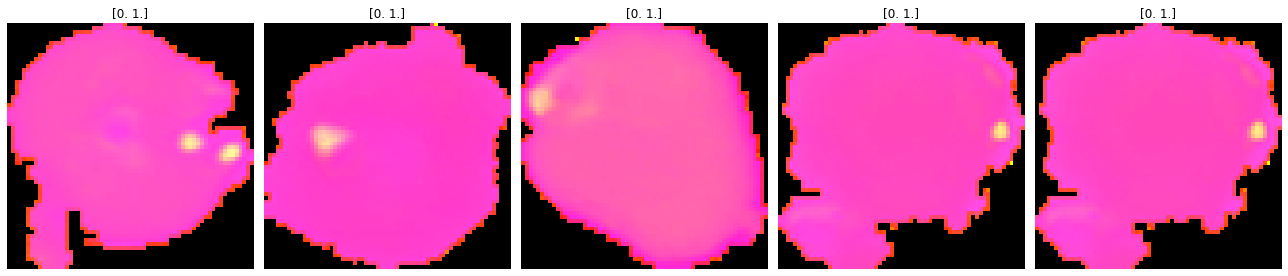

In [ ]:
# Visualize Test Data
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

Observations and Insight Both train and test images display a considerable number of parasitized images.Widely infected blood cells have a spread of the virus across the blood cell as displayed in blue and yellow markers.